In [1]:
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
# Load data into a Pandas dataframe
iris = sns.load_dataset("iris")

In [6]:
iris.drop('species', axis=1, inplace=True)
# X = dataset.iloc[:, [3, 4]].values

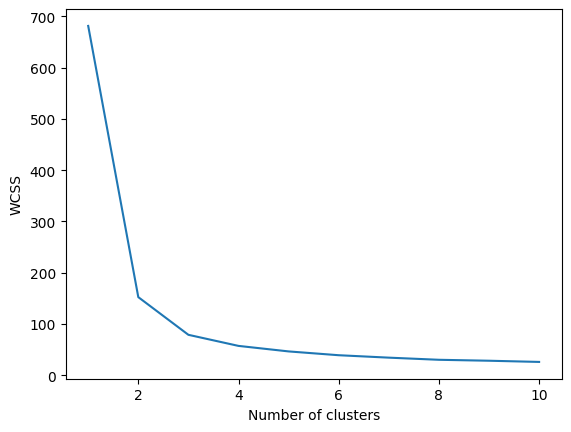

In [8]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(iris)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

IMAGE SEGMENTATION WITH K-MEANS

In [23]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

(1390, 866, 3)

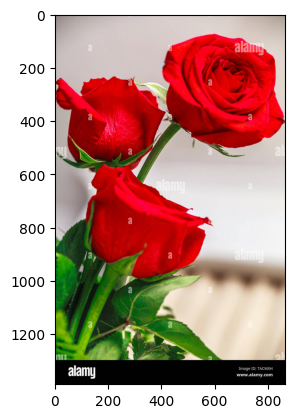

In [24]:
# Load the image
image = cv2.imread('flower.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
plt.imshow(image)
image.shape

In [13]:
# Reshape the image into a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

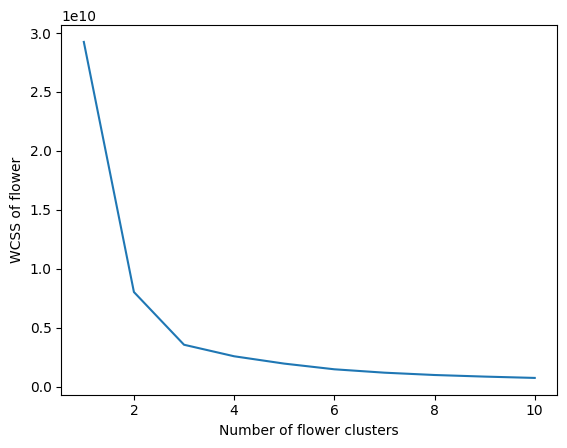

In [25]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pixel_values)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of flower clusters')
plt.ylabel('WCSS of flower')
plt.show()

In [19]:
# Define the number of clusters (K)
k = 3  # You can change this to any number of clusters

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(pixel_values)

KMeans(n_clusters=3, random_state=0)

In [20]:
# Get the cluster centers (color centroids)
centers = np.uint8(kmeans.cluster_centers_)

# Map each pixel to its closest cluster center
labels = kmeans.labels_

In [21]:

# Reshape labels back to the original image dimension
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

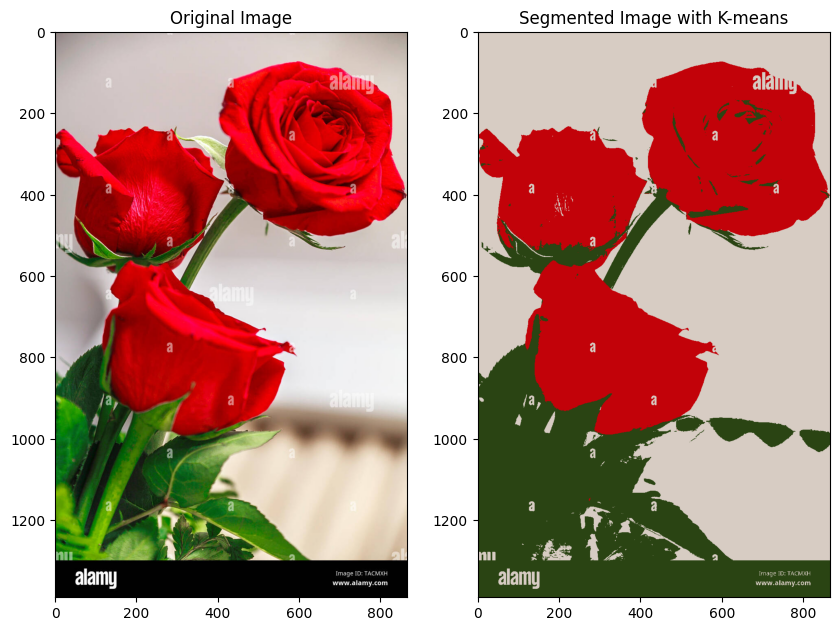

In [22]:
# Display the original and segmented images
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image with K-means')

plt.show()